In [2]:
import matplotlib.pyplot as plt

# SMA - Simple Moving Average

In [3]:
def calculate_sma(source, length): 
    sma_values = [] 

    for i in range(len(source)): 
        if i < length - 1: 
            sma_values.append(None)  
        else:
            sma = sum(source[i - length + 1:i + 1]) / length 
            sma_values.append(sma) 

    return sma_values 


In [4]:
source = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
sma_length = 3

sma_result = calculate_sma(source, sma_length)
print(sma_result)

[None, None, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0]


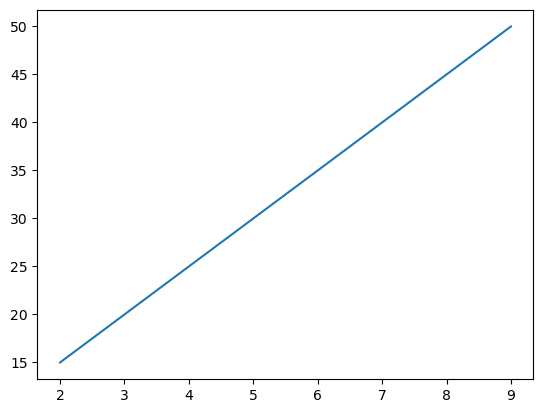

In [5]:
plt.plot(sma_result);

# RMA - RSI Moving Average (relative strength index)

In [6]:
def calculate_rma(source, length):
    alpha = 1 / length
    rma_values = []

    for i in range(len(source)):
        if i == 0:
            rma = source[i]  
        else:
            rma = (1 - alpha) * source[i] + alpha * rma_values[i - 1]

        rma_values.append(rma)

    return rma_values


In [7]:
source_data = [10, 12, 15, 18, 22, 20, 17, 14, 12, 10]
rma_length = 3

rma_result = calculate_rma(source_data, rma_length)
print(rma_result)

[10, 11.333333333333332, 13.777777777777779, 16.592592592592595, 20.19753086419753, 20.06584362139918, 18.021947873799725, 15.340649291266576, 13.113549763755525, 11.037849921251842]


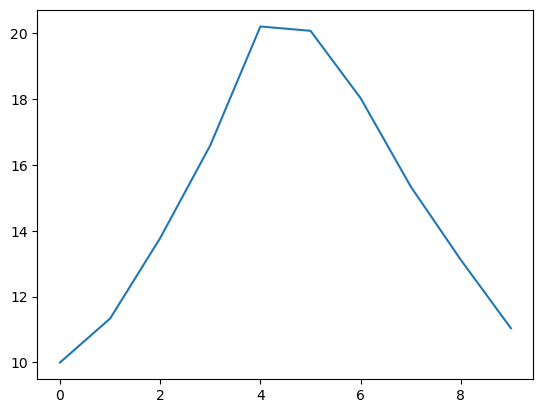

In [8]:
plt.plot(rma_result);

# EMA - Exponential Moving Average 

In [9]:
def calculate_ema(source, length):
    alpha = 2 / (length + 1)
    ema_values = []

    for i in range(len(source)):
        if i == 0:
            ema = source[i]
        else:
            ema = alpha * source[i] + (1 - alpha) * ema_values[i - 1]

        ema_values.append(ema)

    return ema_values

In [10]:
source_data = [10, 12, 15, 18, 22, 20, 17, 14, 12, 10]
ema_length = 3

ema_result = calculate_ema(source_data, ema_length)
print(ema_result)

[10, 11.0, 13.0, 15.5, 18.75, 19.375, 18.1875, 16.09375, 14.046875, 12.0234375]


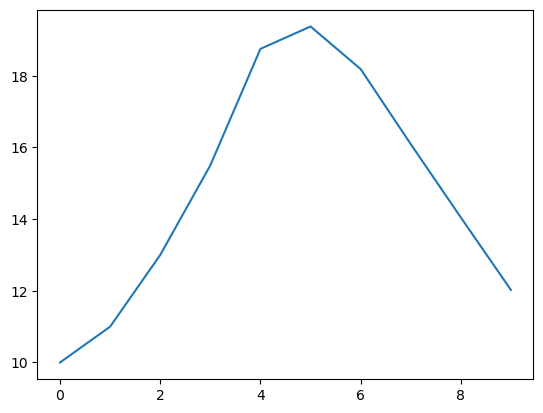

In [11]:
plt.plot(ema_result);

# RSI - Relative Strength Index

In [12]:
def calculate_rsi(source, length):
    upward_changes = [max(0, source[i] - source[i - 1]) if i > 0 else 0 for i in range(len(source))]
    downward_changes = [max(0, source[i - 1] - source[i]) if i > 0 else 0 for i in range(len(source))]

    upward_ema = calculate_rma(upward_changes, length)
    downward_ema = calculate_rma(downward_changes, length)

    rs = [upward_ema[i] / downward_ema[i] if downward_ema[i] != 0 else 0 for i in range(len(upward_ema))]

    rsi_values = [100 - (100 / (1 + rs_value)) if rs_value != 0 else 0 for rs_value in rs]

    return rsi_values

In [13]:
source = [10, 12, 15, 18, 22, 20, 17, 14, 12, 10]
rsi_length = 3

rsi_result = calculate_rsi(source, rsi_length)
print(rsi_result)

[0, 0, 0, 0, 0, 47.402597402597394, 14.079074252651878, 4.528535980148874, 1.9215583048170686, 0.7046332046331969]


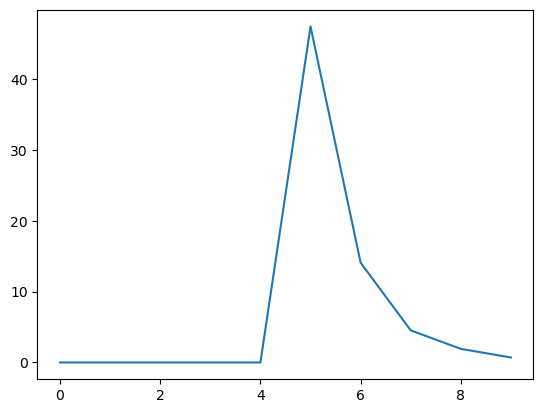

In [14]:
plt.plot(rsi_result);

# MFI - Money Flow Index

In [15]:
def calculate_mfi(highs, lows, closes, volumes, length):
    typical_prices = [(high + low + close) / 3 for high, low, close in zip(highs, lows, closes)]
    raw_money_flow = [tp * volume for tp, volume in zip(typical_prices, volumes)]

    positive_money_flow = [rmf if close > closes[i - 1] else 0 for i, (rmf, close) in enumerate(zip(raw_money_flow, closes))]
    negative_money_flow = [rmf if close < closes[i - 1] else 0 for i, (rmf, close) in enumerate(zip(raw_money_flow, closes))]

    mfr_values = []
    for i in range(length, len(typical_prices)):
        sum_pmf = sum(positive_money_flow[i - length + 1 : i + 1])
        sum_nmf = sum(negative_money_flow[i - length + 1 : i + 1])

        if sum_nmf == 0:
            mfr = 100  
        else:
            mfr = sum_pmf / sum_nmf

        mfr_values.append(mfr)

    mfi_values = [100 - (100 / (1 + mfr)) for mfr in mfr_values]

    return [None] * (length - 1) + mfi_values

In [16]:
highs = [50, 55, 60, 58, 62, 65, 70, 68, 72, 75, 80, 78, 82]
lows = [45, 50, 55, 52, 57, 60, 62, 58, 65, 70, 75, 72, 78]
closes = [48, 53, 58, 56, 60, 63, 68, 66, 70, 73, 78, 76, 80]
volumes = [100000, 120000, 150000, 110000, 130000, 140000, 160000, 180000, 200000, 190000, 220000, 210000, 230000]
mfi_length = 7

mfi_result = calculate_mfi(highs, lows, closes, volumes, mfi_length)
print(mfi_result)


[None, None, None, None, None, None, 70.54427838501003, 73.82038065027756, 75.68475809050315, 86.18870639012108, 70.11150790758691, 72.95746785361028]


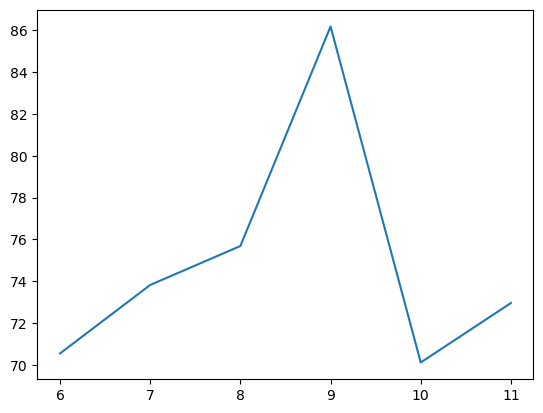

In [17]:
plt.plot(mfi_result);

# HMA - Hull Moving Average

In [35]:
import numpy as np

def calculate_wma(source, length):
    if length == 1:
        return np.array(source)
    weights = np.arange(1, length + 1)
    wma = np.convolve(source, weights, mode='valid') / weights.sum()
    return wma

def calculate_hma(source, length):
    half_length = int(length / 2)
    sqrt_length = int(np.sqrt(length))

    wma1 = calculate_wma(source, half_length)
    wma2 = calculate_wma(wma1, sqrt_length)
    wma3 = calculate_wma(source, length)

    min_len = min(len(wma1), len(wma2), len(wma3))

    hma = 2 * wma3[:min_len] - wma2[:min_len]

    return hma

In [58]:
source = [10, 12, 15, 18, 22, 20, 17, 14, 12, 10]
hma_length = 9

hma_result = calculate_hma(source, hma_length)
print(hma_result)


[16.02222222 15.71111111]


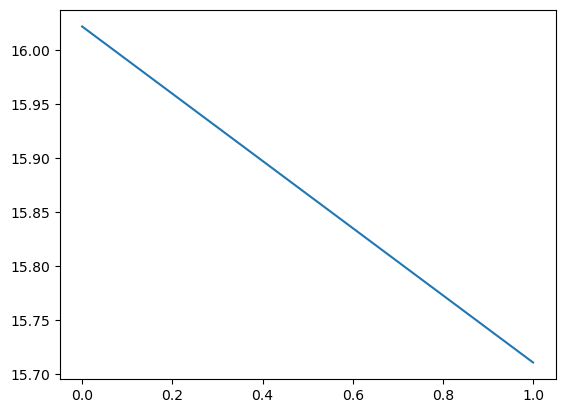

In [59]:
plt.plot(hma_result);

# VWAP - Volume Weighted Average Price

In [64]:
import numpy as np

def calculate_vwap(source, volumes):
    source = np.array(source)
    volumes = np.array(volumes)

    cumulative_price_volume = np.cumsum(source * volumes)
    cumulative_volume = np.cumsum(volumes)

    vwap = cumulative_price_volume / cumulative_volume

    return vwap


In [62]:
closing_prices = [50, 55, 60, 58, 62]
trading_volumes = [100000, 120000, 150000, 110000, 130000]

vwap_result = calculate_vwap(closing_prices, trading_volumes)
print(vwap_result[-1]) 

57.442622950819676


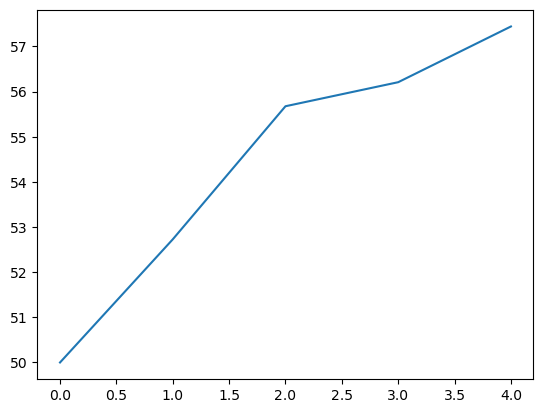

In [63]:
plt.plot(vwap_result);